# Simple linear regression

Using an open source [Obesity Levels Based On Eating Habits and Physical Condition dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) we're going to **model** and then **predict** *weight* based on multiple features with simple linear regression. The dataset is provided by [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/) which contains multiple datasets useful for studying and experimenting.

Imports

In [1]:
!pip install ucimlrepo

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import io

from ucimlrepo import fetch_ucirepo

## Load the [obesity dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

Really, take a look into the documentation :)

In [3]:
# fetch dataset
obesity_data = fetch_ucirepo(id=544)
obesity_data

{'data': {'ids': None,
  'features':       Gender        Age    Height      Weight family_history_with_overweight  \
  0     Female  21.000000  1.620000   64.000000                            yes   
  1     Female  21.000000  1.520000   56.000000                            yes   
  2       Male  23.000000  1.800000   77.000000                            yes   
  3       Male  27.000000  1.800000   87.000000                             no   
  4       Male  22.000000  1.780000   89.800000                             no   
  ...      ...        ...       ...         ...                            ...   
  2106  Female  20.976842  1.710730  131.408528                            yes   
  2107  Female  21.982942  1.748584  133.742943                            yes   
  2108  Female  22.524036  1.752206  133.689352                            yes   
  2109  Female  24.361936  1.739450  133.346641                            yes   
  2110  Female  23.664709  1.738836  133.472641                

### Inspect the data

In [ ]:
obesity_data.keys()

In [ ]:
display(obesity_data.data)

In [ ]:
obesity_data.data.features

In [ ]:
obesity_data.data.features.info()

In [ ]:
obesity_data.data.features.describe()

Notice, that `obesity_data.data.features` dataset is a `DataFrame` that consists of 16 columns (15 features and our target - `Weight`).

Now, let's look deeper inside the data:

### Correlation matrix

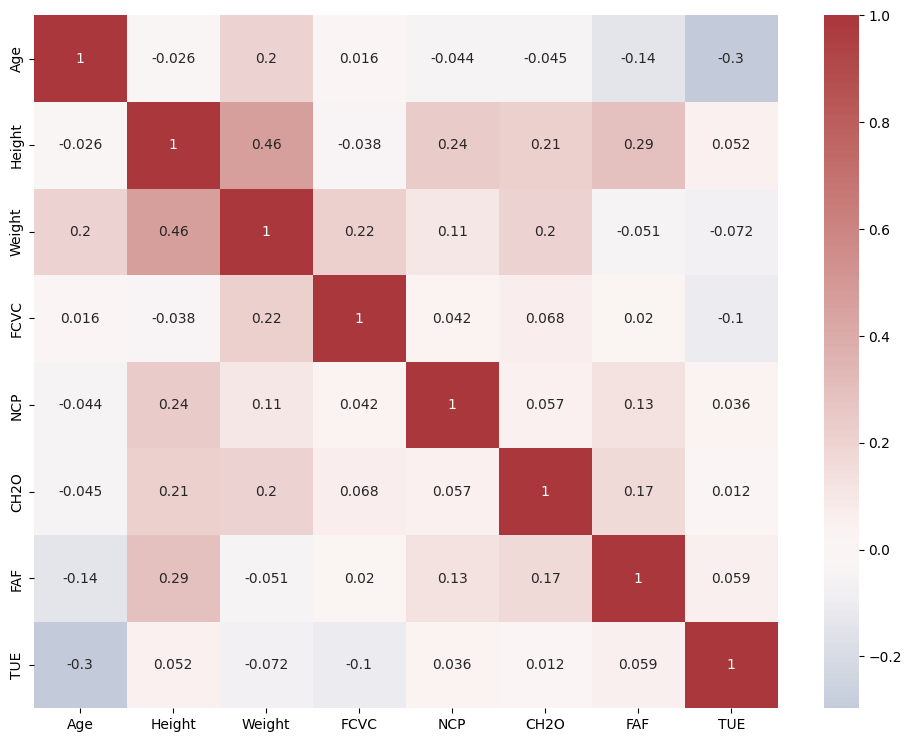

In [5]:
# create correlation matix
df = obesity_data.data.features
numerical_df = df.select_dtypes(include=['number'])
corr = numerical_df.corr()

# plot matrix
plt.figure(figsize=(12,9))

sns.heatmap(
    corr,
    center = 0.0,
    annot=True,
    cmap='vlag'
    )

plt.show()

Answer a few questions:

* Are features in the original dataset numerical or categorical?
* How many features does the dataset have?


**Now, let's look at model of the *weight* (target) based on frequency of vegetables in the meals (FCVC).**

## Model data

Modelling the data usually consists of following steps:

1. Preparing the data: usually you want to select specific columns from your dataframe to create so called feature vector - a set of independent variable(s) (X), and target vector - dependent variable (y).
2. Creating the model object: for most of classic ML cases you will be using sci-kit learn library. To perform linear regression we will use the linear model: [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).
3. Feeding the model object with our data (so called fitting). Sci-kit learn (and most of other Python libraries for ML) has specific API. Fitting data to the model is done using the [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method.
4. Predicting data on a basis of our model. Prediction is done using the [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method. These methods are called **on** model object, e.g., `lm.fit(X,y)`.
5. Visualizing data. In case of one-variable linear regression, try to plot your estimated and original data to see the relationship.
6. Testing goodness of the regression model. Usually, in regression case you want to calculate $R^2$ and MAE, or MSE metrics.

**Converting these steps to the code:**

```
# 1. Prepare data
X = df[['columnA']].to_numpy()
y = df[['columnB']].to_numpy()

# 2. Create model object
from sklearn import linear_model
lm = linear_model.LinearRegression()

# 3. Fit the model
lm.fit(X,y)

# 4. Predict data
y_predicted = lm.predict(X)

# 6. Test the fitted model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y, y_predicted)
mean_squared_error(y, y_predicted)
```

## Exercise 1:

You want to see what is the relationship between `FCVC` (one feature from df dataframe) and `weight` (target). Does weight decrease linearly when frequency of vegetables in a meal increases? Or there is no relationship? Or maybe the relationship will not be linear and the linear model is a bad choice? Using the code below try to answer these questions. **That's what analyzing data is about**.

In [ ]:
# 1a. Select FCVC column and transform it to ndarray.
# Make sure that it is 2D array of (n_samples, n_features) shape. - SEE DOCS

X = # your code

# 1b. Select weight column and transform it to ndarray.
y = # your code

# 2. Create an object LinearModel() and store it in lin_regressor variable
lin_regressor = linear_model.LinearRegression()

# 3. Fit LinearModel() object with our data
# your code

# 4. Predict y data based on fitted model and X data
y_predicted = # your code

# 5. Visualize original data and predicted data
sns.scatterplot(data = df, x='FCVC', y='Weight') # original
sns.lineplot(x = X.flatten(), y = y_predicted.flatten()) # predicted

# 6. Calculate the coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y, y_predicted)}")
print(f"Mean squared error: {'tu by było dobrze policzyc MSE ;)'}")

## Exercise 2 (optional):
This exercise may sound a little boring but as we want to learn data analysis it's necessery to deeply understand some terms. Now, try to answer some questions to increase your understanding of metrics and models:

1. What does it exactly mean that R^2 value is 0.046?
2. Is $R^2$ the same as $r^2$ (correlation coefficient)? Estimate the correlation between diabetes and bmi and check it yourself.

In [ ]:
# your code here

Is this **always** the case?

3. Try to interpret MSE from exercise 1. What else do you need to make MSE meaningful? Is there any better mean error metric that is scale-independent and can be interpreted standalone? [HINT](https://www.statisticshowto.com/mean-absolute-percentage-error-mape/)

4. What is the exact linear model of our `weight ~ FCVC`? Write it down in a form of: $y = a + bx$

5. If you've ever encountered the concept of confidence intervals (CI), you know that it is important and useful in estimating how reliable an effect is obtained. Try calculating the 95% CI for the b coefficient. If this takes more than 5 minutes to achieve, you should skip this exercise.

## Exercise 3 (optional):

In previous exercise you were using classical ML library (although we did not perform ML per se). If you are interested in *classical* statistical modelling of your data - good news - you don't have to do this in R. There are nice Python libraries that allow you to create such models in R-style syntax. One of most popular packages is [statsmodels](https://www.statsmodels.org/stable/index.html).

Try to model the same relation as in exercise 1, but using statsmodels. **Compare results of sklearn and statsmodels.** Read coefficients and CI.

Which library was better to get CI? This exercise was to show you that there is no need to stick to one library. You should always choose what is most suited to your goal.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# your code here

## Exercise 4:

We know, thet height is crutial for estimating weight. Create one model with height, and the second model with height and several other features. Are new features add usefull information for regression?

In [ ]:
# model 1
X = df[['Height']].to_numpy()
y = df['Weight'].to_numpy().ravel()

lin_regressor = linear_model.LinearRegression()
lin_regressor.fit(X,y)

y_predicted = lin_regressor.predict(X)

print(f'MODEL 1 -------')
print(f"Coefficient of determination: {r2_score(y, y_predicted)}")
print(f"Mean squared error: {mean_squared_error(y, y_predicted)}\n")

# model 2

# your code here

print(f'MODEL 2 -------')
print(f"Coefficient of determination: {r2_score(y, y_predicted)}")
print(f"Mean squared error: {mean_squared_error(y, y_predicted)}\n")

* Print regression coefficients of features. These are so called *effects*.
* Is there effect of `age` greater than effect of `FCVC`?

In [ ]:
# your code

## Predictive modelling: train-test split

In previous exercises we only modeled relationships on the data we've already had. Do you think that `weight ~ height + FCVC + Age` is always true? In other words, do you expect every person in the world to have exactly the same effect? If not - why do the authors of almost all papers do so? ;)

It is often important to see if your model has predictive power - to see, whether it works well for unseen data. In that case, you already have a model trained beforehand on some data (like our model `weight = b0 + b1*height + b2*FCVC + b3*Age`).

**What you want to do is predict y based on new, previously unused data, and see how good that prediction is relative to the original, real target data.**

In [7]:
# 1. Prepare data: select Height, FCVC, and Age column as X and Weight column as y
X = df[['Height','FCVC','Age']].to_numpy()
y = df[['Weight']].to_numpy()

# Split your data into two separate sets: training and testing.
# Parameter 'test_size' represent the proportion of the dataset to include in the test split .
#
# to ensure repeatability of splits, we set the random state
# random state (read more: https://en.wikipedia.org/wiki/Random_seed) is used
# whenever we want to have repeatable results of an operation that involves
# a pseudo-random operation, e.g. picking "random" samples from a set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(f"Shape of the X train dataset: {X_train.shape}")
print(f"Shape of the X test dataset: {X_test.shape}")
print(f"Shape of the y train dataset: {y_train.shape}")
print(f"Shape of the y test dataset: {y_test.shape}")

Shape of the X train dataset: (1688, 3)
Shape of the X test dataset: (423, 3)
Shape of the y train dataset: (1688, 1)
Shape of the y test dataset: (423, 1)


## Exercise 5:

Now we can train the model using the training sets and then predict y using only testing set - to see the goodness of prediction on unseen data


In [12]:
# 2. Create an object LinearModel() and store it in lin_regressor variable
lin_regressor = linear_model.LinearRegression()

# 3. Fit LinearModel() object with our train(!) data
lin_regressor.fit(X_train,y_train)
# 4. Predict y data based on fitted model and test(!) data
y_predicted = lin_regressor.predict(X_test)

# 5. Visualize original data and predicted data
#sns.scatterplot(x=X_test.flatten(), y = y_test.flatten()) # original test data
#sns.lineplot(x = X_test.flatten(), y = y_predicted.flatten()) # predicted test data

# 6. Calculate the coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, y_predicted)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_predicted)}")

Coefficient of determination: 0.32056414747500594
Mean squared error: 479.0776477576002


* Are these values different from those calculated in Exercise 1?

# And voilà!

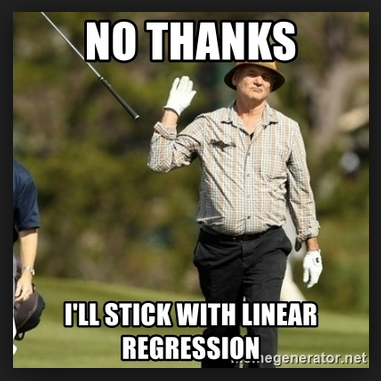

# Notebook Recap

In this notebook we:

- fitted a linear regression model on a whole dataset using scikit-learn library;
- estimated the effect of independent variable on dependent variable;
- fitted a linear regression model on a training dataset and evaluated its performance on the testing data to check its **generalizability**;
- introduced the scikit-learn API `.fit(X, y)` (to train a model), `.predict(X)` (to make predictions);
- used `r2_score(predicted, y)`, `mean_absolute_error(predicted, y)` and `mean_absolute_error(predicted, y)` to evaluate model performance.